In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/concrete/concrete_data.csv


# Linear Regression | Data Analysis | Data Visualization | Power Transformer

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings



#handle warnings, errors
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [4]:
df= pd.read_csv('/kaggle/input/concrete/concrete_data.csv')

In [5]:
df.shape

(1030, 9)

In [6]:
df.duplicated().sum()

np.int64(25)

In [7]:
df.drop_duplicates(inplace= True)

In [8]:
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1005 non-null   float64
 1   Blast Furnace Slag  1005 non-null   float64
 2   Fly Ash             1005 non-null   float64
 3   Water               1005 non-null   float64
 4   Superplasticizer    1005 non-null   float64
 5   Coarse Aggregate    1005 non-null   float64
 6   Fine Aggregate      1005 non-null   float64
 7   Age                 1005 non-null   int64  
 8   Strength            1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [10]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [11]:
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
Blast Furnace Slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
Fly Ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
Water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
Superplasticizer,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
Coarse Aggregate,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
Fine Aggregate,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
Age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
Strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


<Axes: >

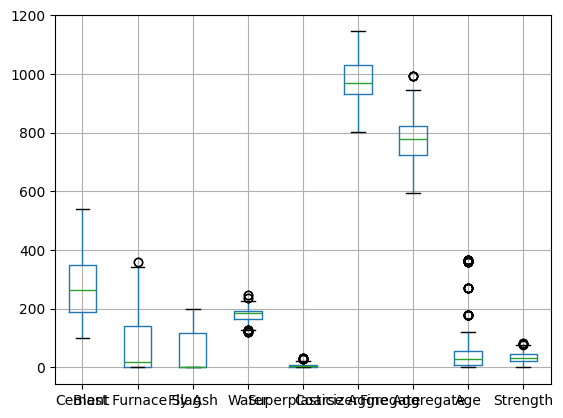

In [12]:
df.boxplot()

In [13]:
out_cols = df.select_dtypes(include='number').columns

def count_outliers_iqr(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return len(col[(col < lower) | (col > upper)])


print("Columns          |  Outlier Count")
print("-"*40)
for col in out_cols:
    count = count_outliers_iqr(df[col])
    print(f"{col:20} | {count:>10}")

Columns          |  Outlier Count
----------------------------------------
Cement               |          0
Blast Furnace Slag   |          2
Fly Ash              |          0
Water                |         15
Superplasticizer     |         10
Coarse Aggregate     |          0
Fine Aggregate       |          5
Age                  |         59
Strength             |          8


In [14]:
for col in out_cols:
    df[col] = np.log1p(df[col])

In [15]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
# Applying Regression without any transformation
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.815582745369245

In [18]:
# Cross-checking with cross val score
lr = LinearRegression()
print(np.mean(cross_val_score(lr,X,y,scoring='r2')))

0.6950165418720355


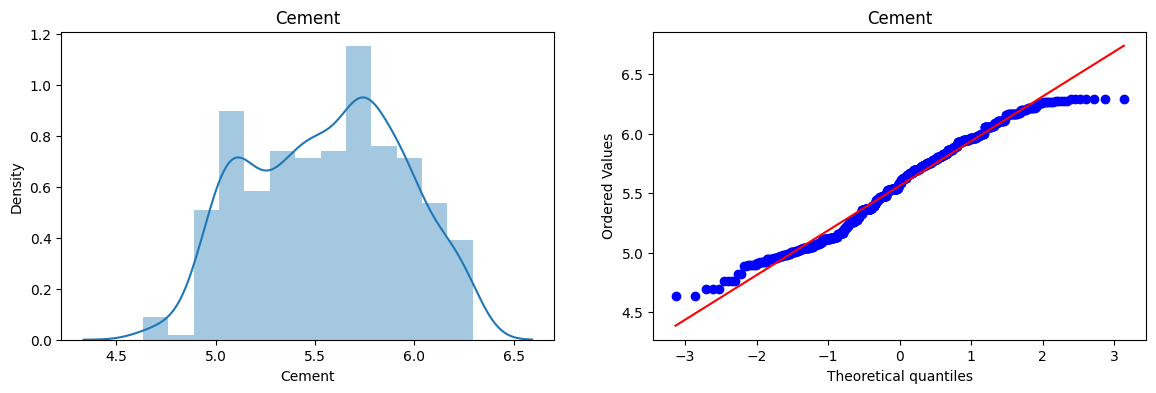

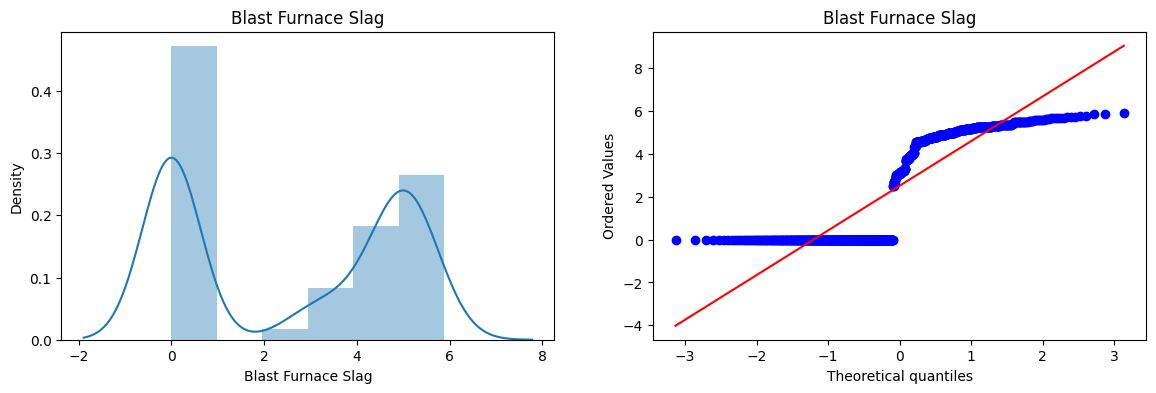

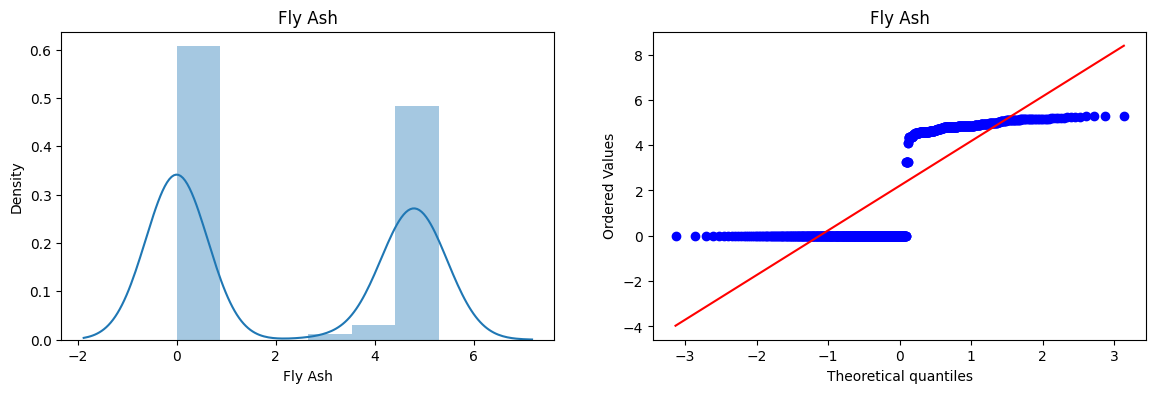

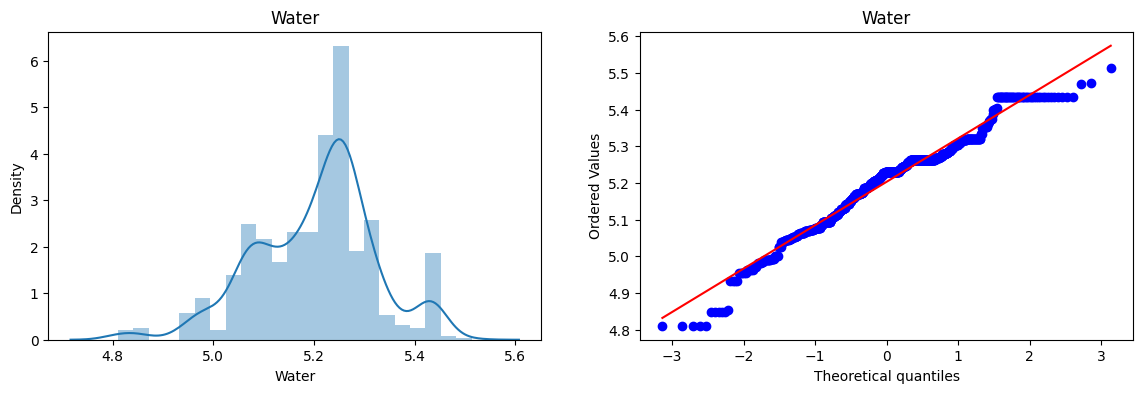

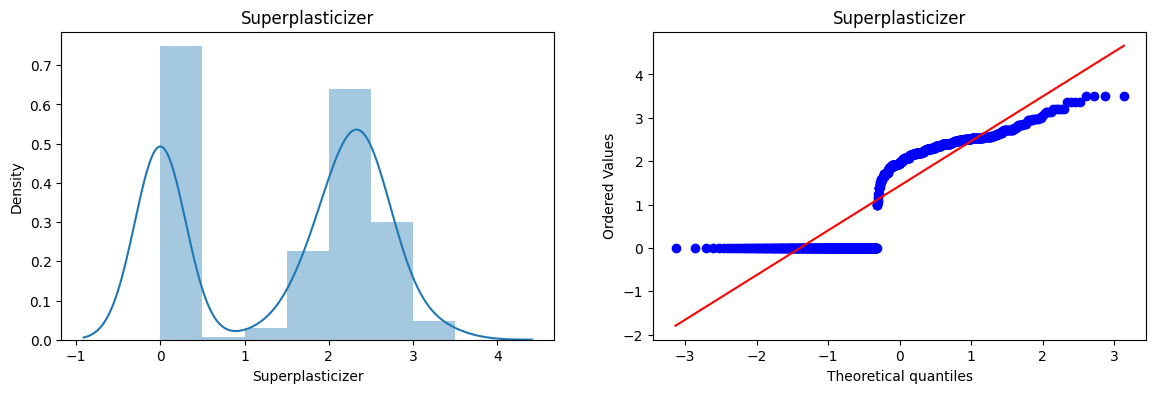

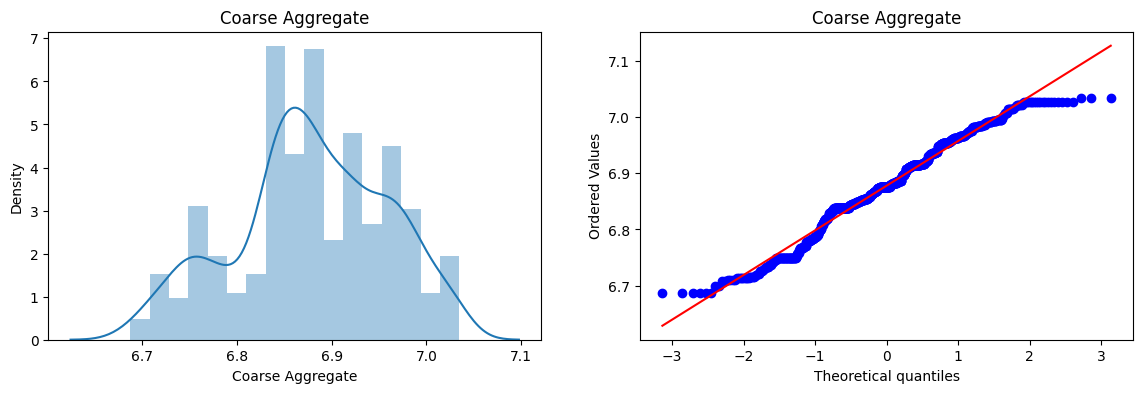

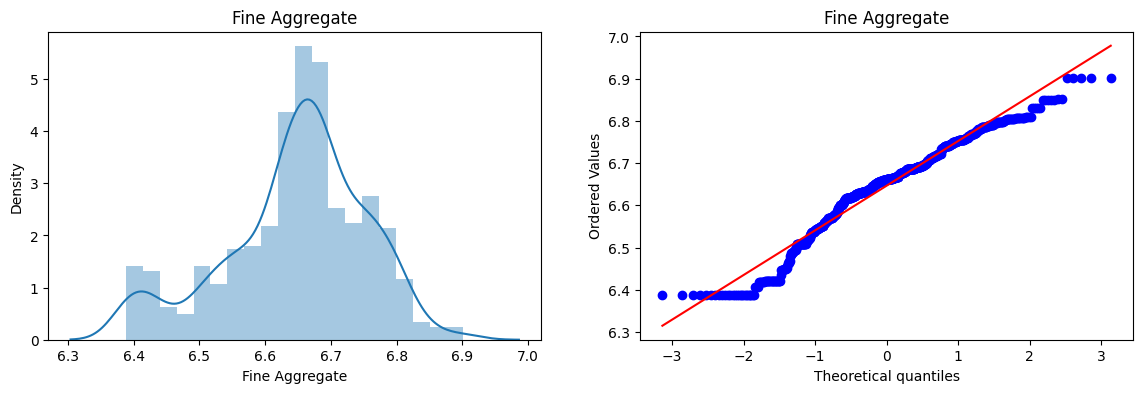

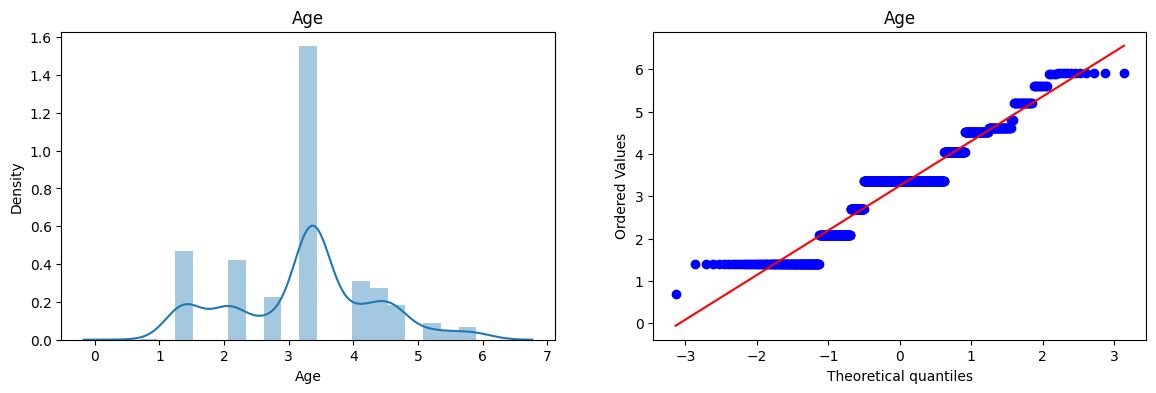

In [19]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [20]:
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

df= pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

In [21]:
# Applying linear regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)

0.8158119900338259

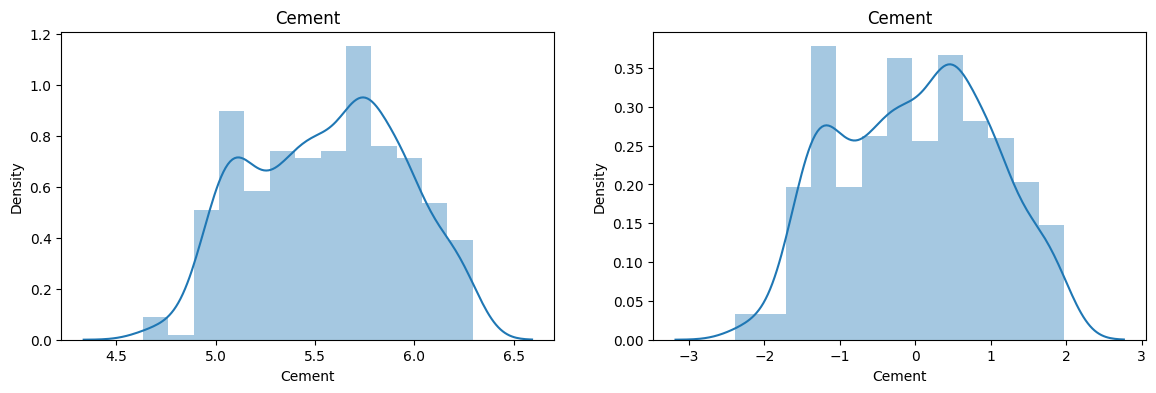

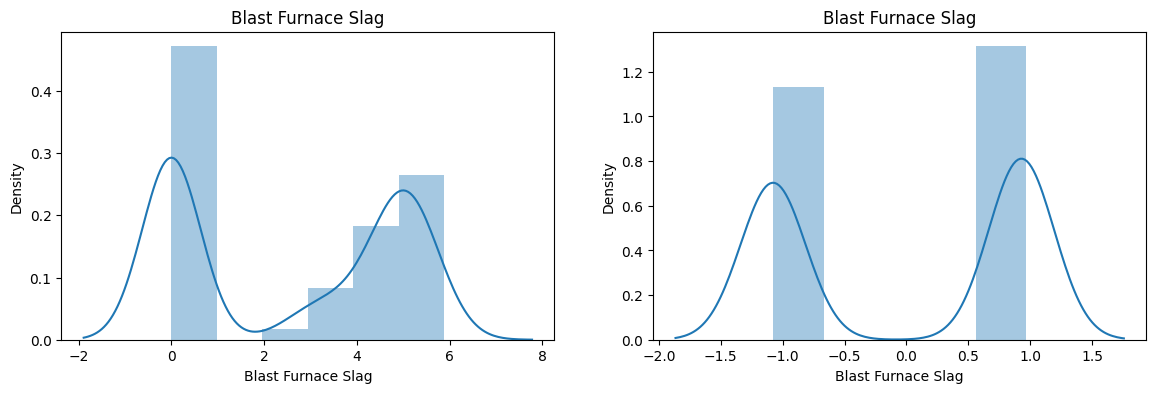

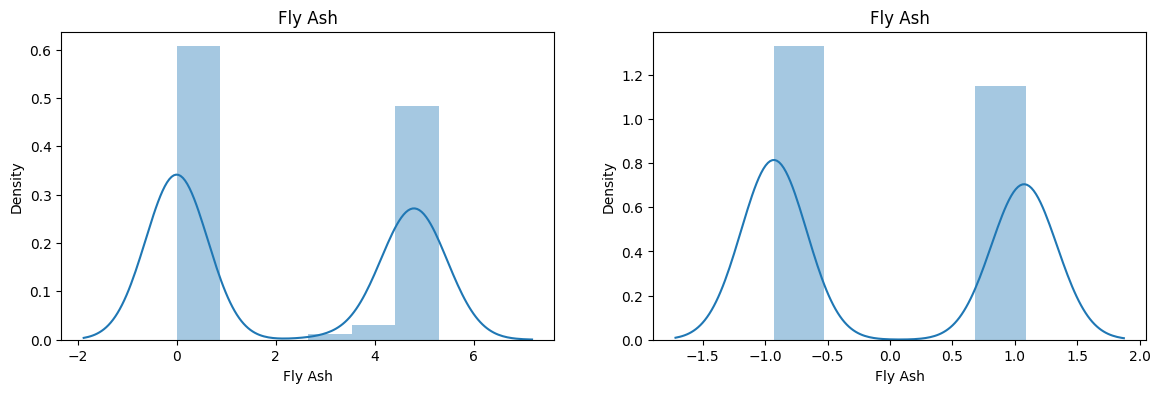

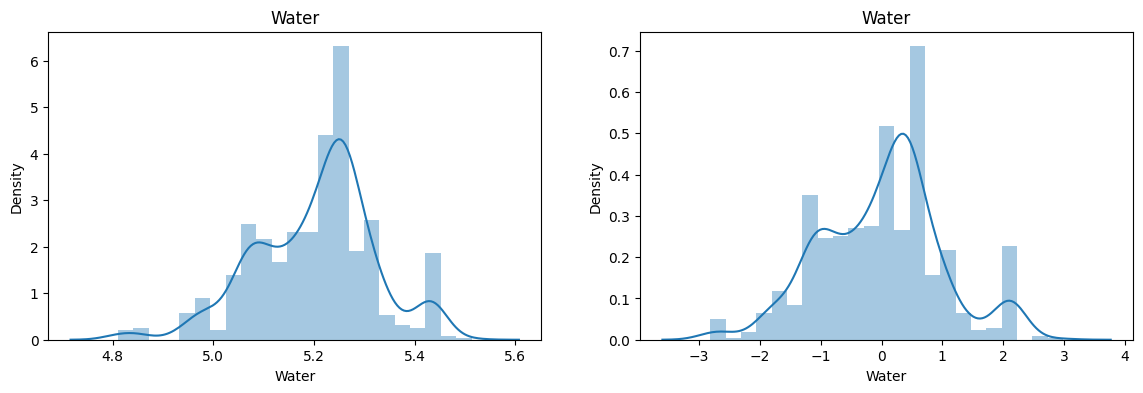

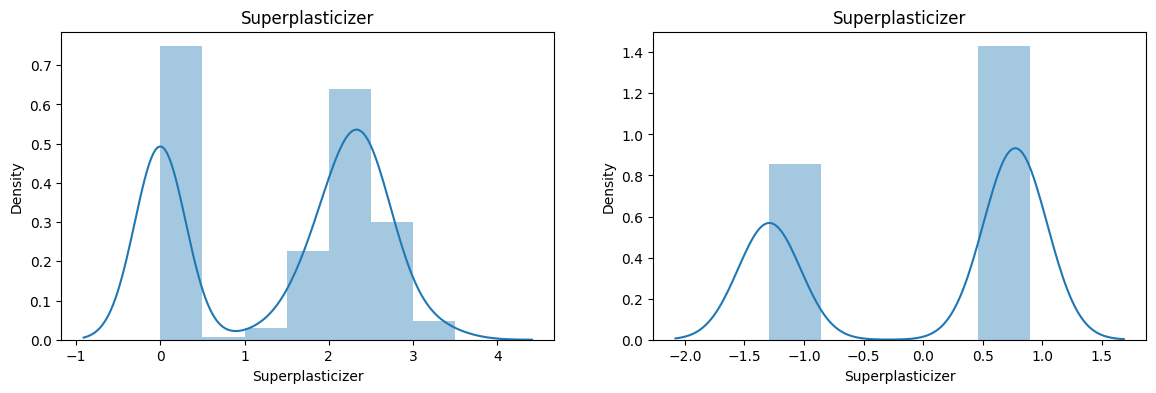

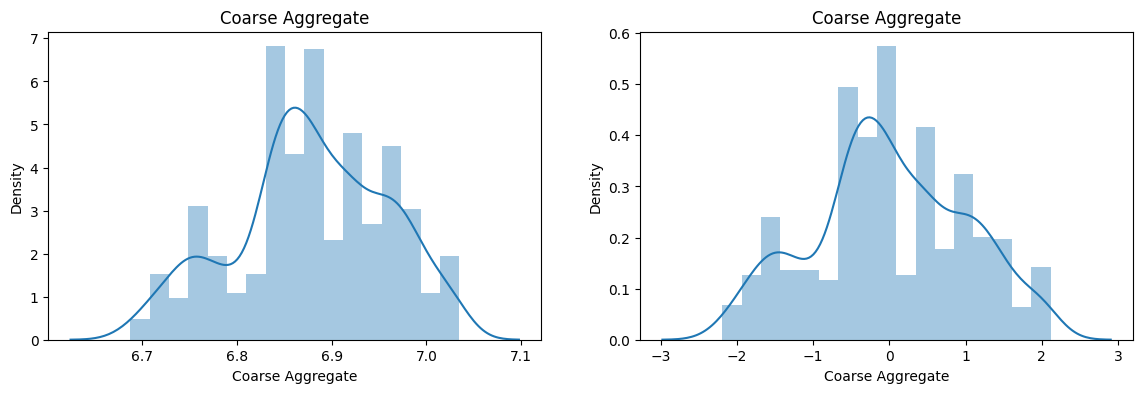

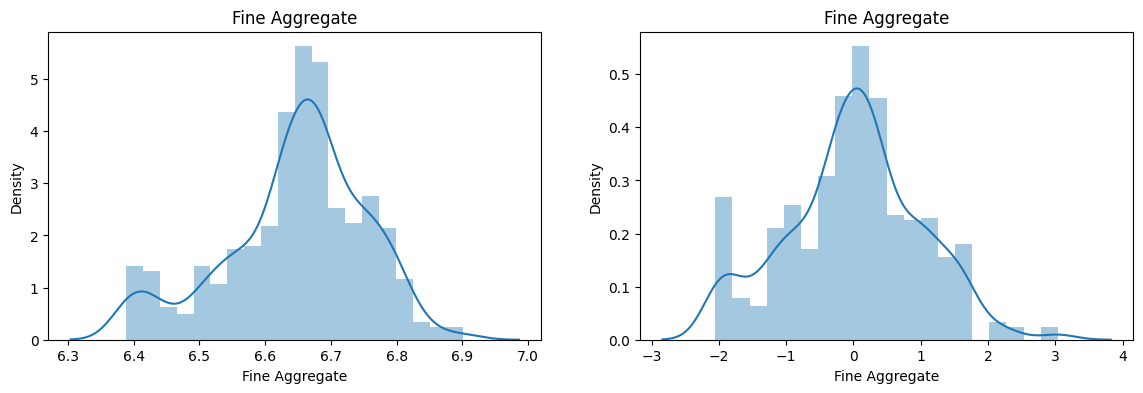

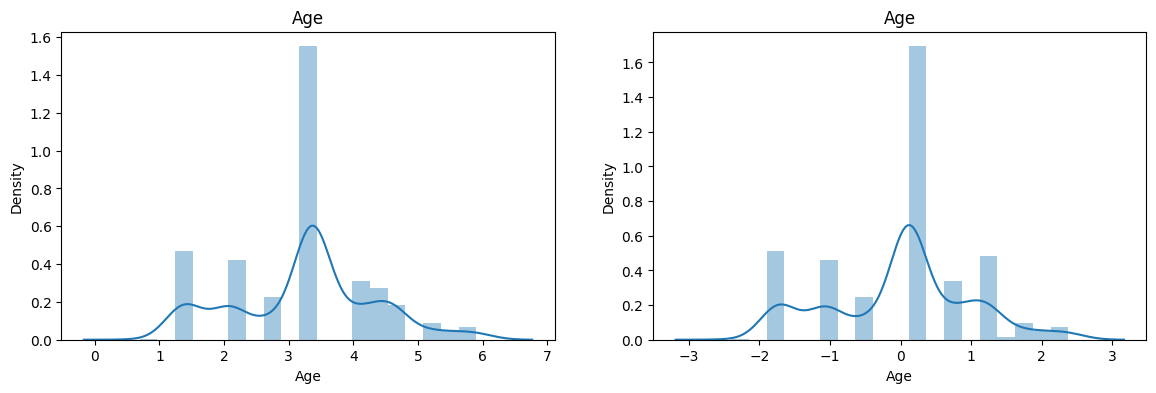

In [22]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()

In [23]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.8141138682807094


,cols,Yeo_Johnson_lambdas
0,Cement,1.488589
1,Blast Furnace Slag,0.164570
2,Fly Ash,-0.255465
3,Water,6.887834
4,Superplasticizer,0.890045
5,Coarse Aggregate,10.349189
6,Fine Aggregate,15.575096
7,Age,0.958227


In [24]:
# applying cross val score

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

np.float64(0.6836237069483515)

In [25]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

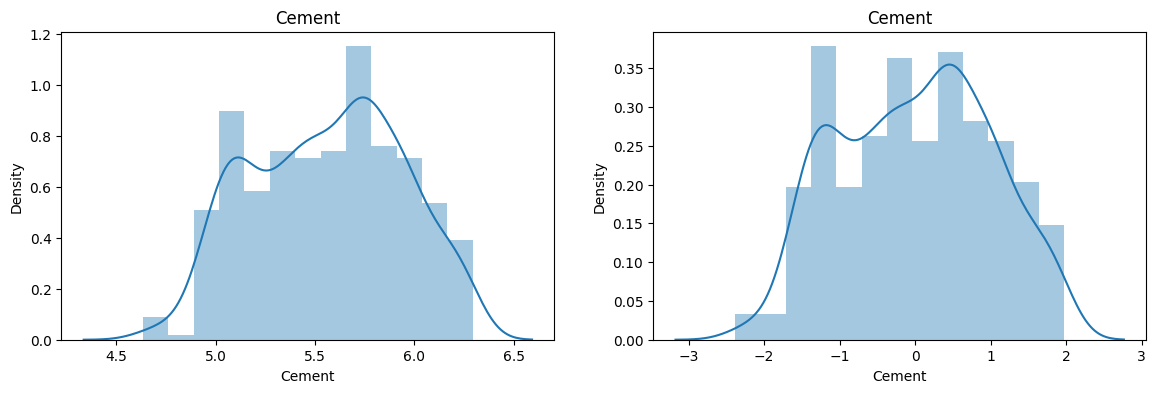

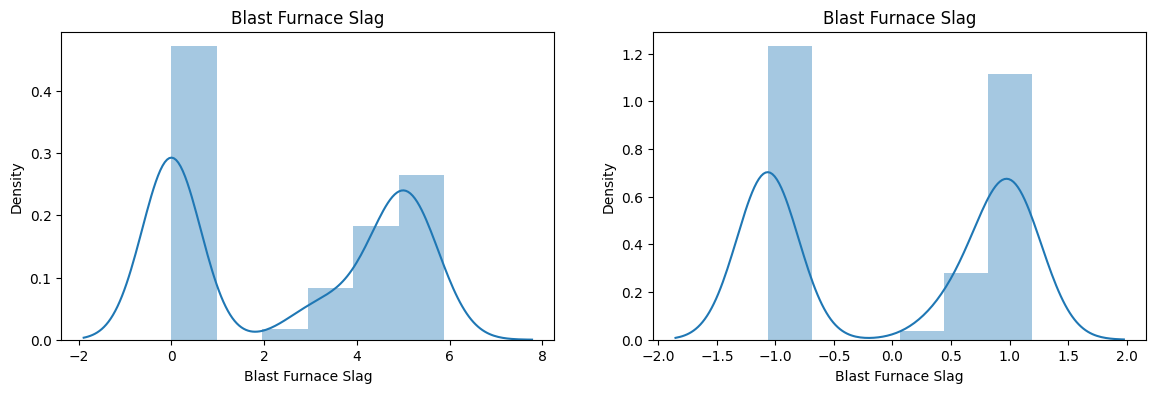

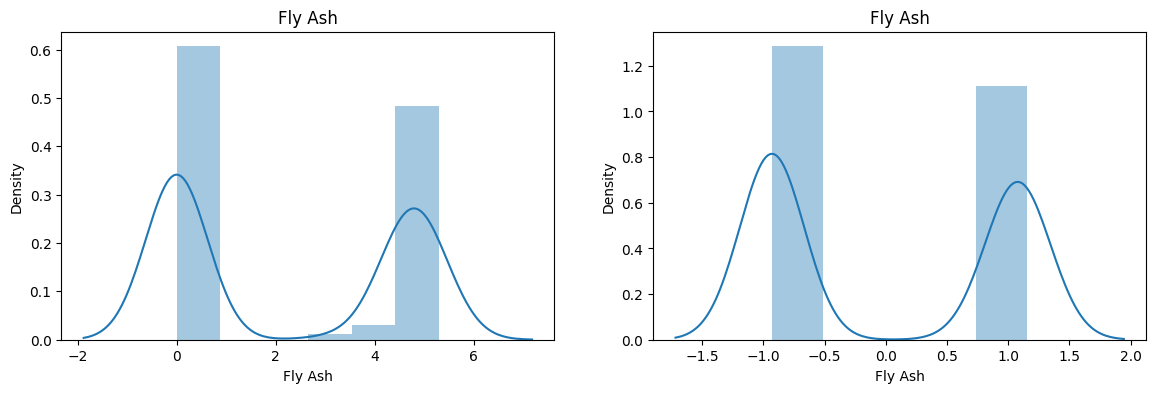

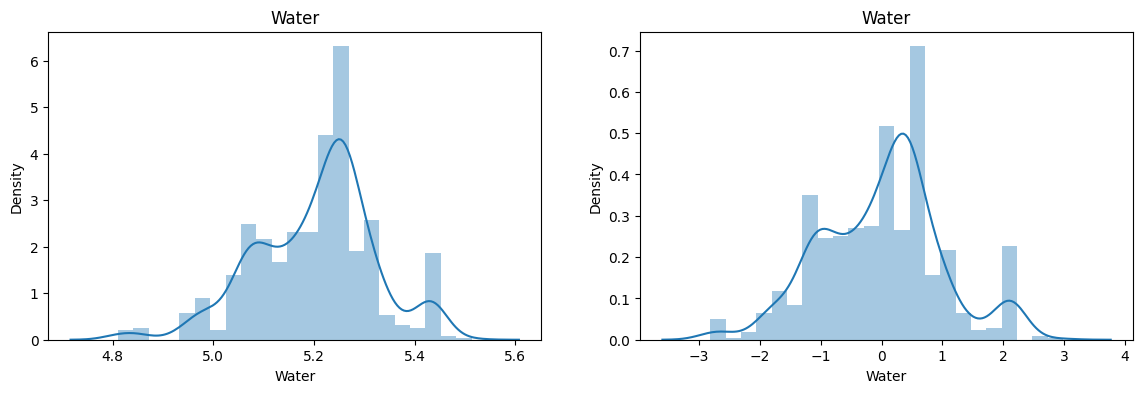

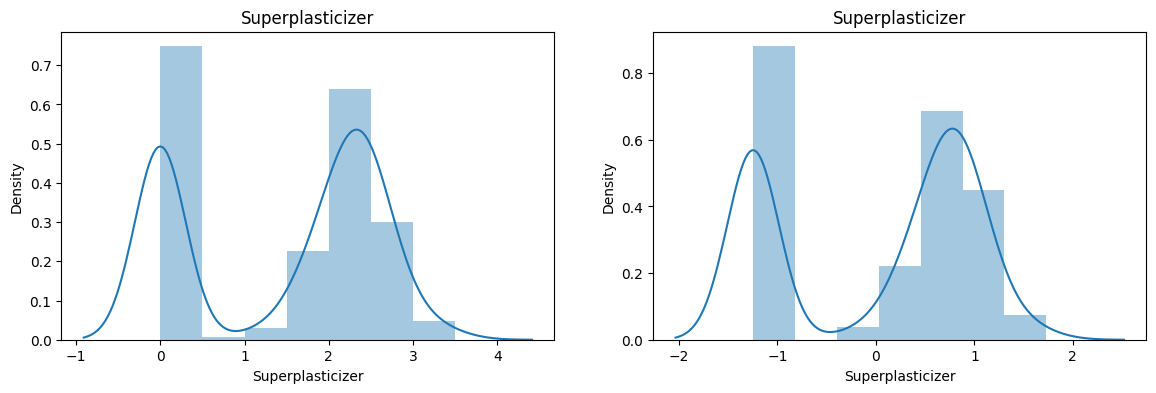

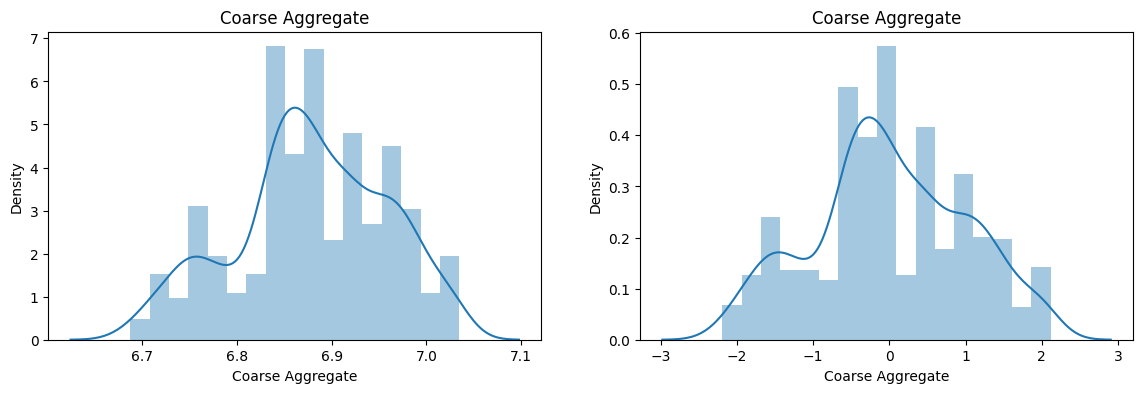

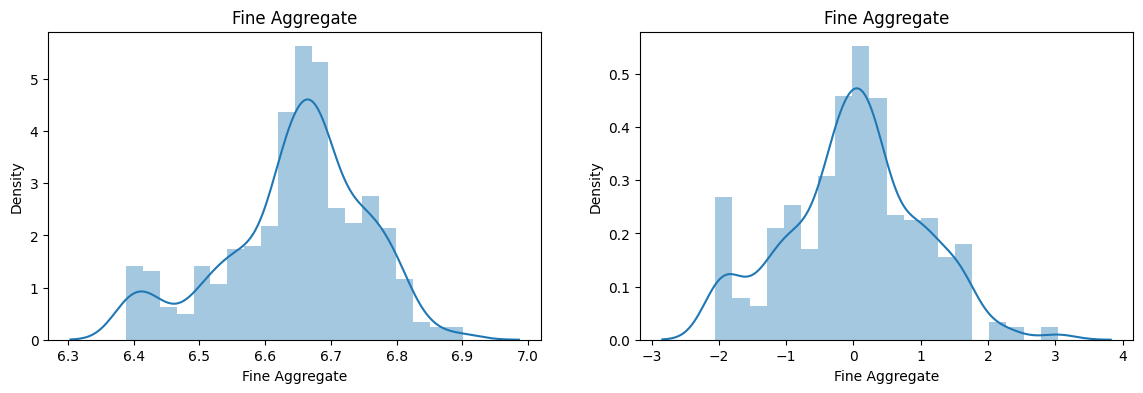

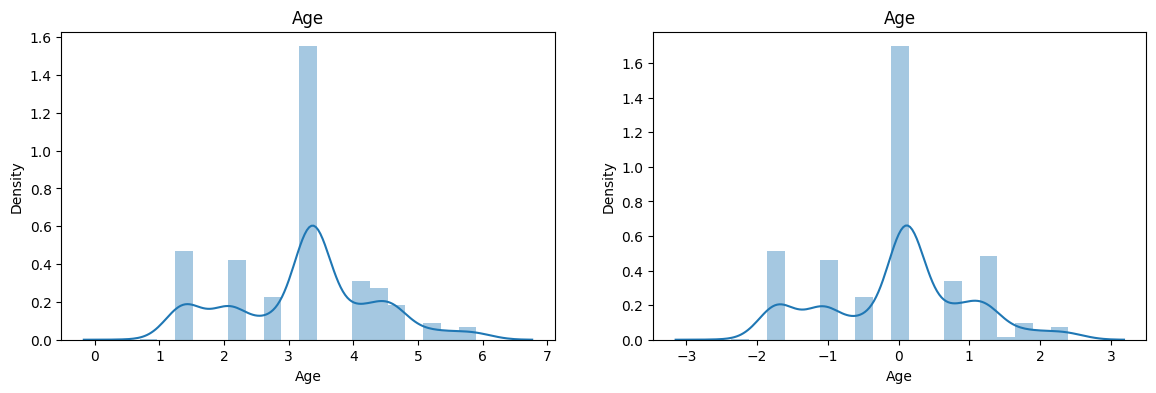

In [26]:
# Before and after comparision for Yeo-Johnson

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed2[col])
    plt.title(col)

    plt.show()

In [27]:
# Side by side Lambdas
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,1.599508,1.488589
1,Blast Furnace Slag,0.135447,0.164570
2,Fly Ash,-0.273349,-0.255465
3,Water,6.725139,6.887834
4,Superplasticizer,0.878877,0.890045
5,Coarse Aggregate,10.876899,10.349189
6,Fine Aggregate,14.914824,15.575096
7,Age,0.923449,0.958227
